In [1]:
# Some usual imports here
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import NumeralTickFormatter
output_notebook()

UNINSURED_DATA_FILE = 'the-number-of-estimated-eligible-uninsured-people-for-outreach-targeting.csv'
INPATIENT_DATA_FILE_2015 = 'Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv'
INPATIENT_DATA_FILE_2014 = 'Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv'
not_needed = ['Provider Street Address', 'Hospital Referral Region (HRR) Description', 'Provider Name']


inpatient_charges = pd.read_csv(INPATIENT_DATA_FILE_2015)
inpatient_charges.drop(not_needed, axis=1)


Loading BokehJS ...

,DRG Definition,Provider Id,Provider City,Provider State,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,BIRMINGHAM,AL,35233,11,1014783.45,171081.18,141193.91
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,PHOENIX,AZ,85054,28,382051.00,194081.39,167511.96
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,SAN DIEGO,CA,92103,21,971881.48,324050.71,294419.62
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SAN DIEGO,CA,92123,18,1517857.61,257177.33,233532.83
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SACRAMENTO,CA,95816,17,1470341.06,346150.12,338472.00
5,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,LOS ANGELES,CA,90095,19,1450590.58,449486.11,404408.74
6,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD,CA,94305,17,2739156.06,442429.18,417977.35
7,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50454,SAN FRANCISCO,CA,94143,19,1578239.63,394118.89,355075.84
8,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50625,LOS ANGELES,CA,90048,44,2361256.77,326124.27,313246.11
9,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,60024,AURORA,CO,80045,11,1017809.00,225019.73,209039.64


In [2]:
inpatient_charges.columns
inpatient_charges.shape

(201876, 12)

In [5]:
## FL, CA, TX, and NY have most entries
inpatient_charges['Provider State'].value_counts()

FL    15371
CA    15113
TX    14171
NY    11257
PA     9586
IL     9128
OH     7917
MI     7540
NJ     6693
NC     6427
GA     5691
VA     5677
MA     5288
IN     5123
TN     5122
MO     5040
MD     4708
AL     4310
KY     3763
SC     3555
WA     3472
AZ     3453
MN     3335
WI     3310
LA     3297
OK     2967
MS     2753
AR     2523
CT     2517
CO     2272
IA     2130
KS     2101
WV     1693
OR     1658
NV     1512
NE     1360
NH     1032
ME     1010
UT      981
NM      939
DC      740
RI      728
DE      707
ID      689
SD      677
MT      617
ND      604
HI      444
VT      345
WY      267
AK      263
Name: Provider State, dtype: int64

In [4]:
inpatient_charges.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,201876.000000,201876.000000,201876.000000,2.018760e+05,201876.000000,201876.000000
mean,255739.198325,47050.984094,36.820959,5.500866e+04,13219.565072,11213.909857
std,151064.388882,27804.910256,51.525284,6.582696e+04,13835.710286,12310.955873
min,10001.000000,1040.000000,11.000000,1.715000e+03,2419.490000,659.260000
25%,110079.000000,25301.000000,15.000000,2.173497e+04,6260.835000,4982.402500
50%,240106.000000,43725.000000,22.000000,3.605010e+04,9185.390000,7680.885000
75%,380027.000000,71901.000000,39.000000,6.347406e+04,14655.012500,12442.505000
max,670100.000000,99801.000000,3990.000000,2.794184e+06,449486.110000,417977.350000


In [6]:
#septicemia most common ? 
inpatient_charges['DRG Definition'].value_counts()


871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                      2837
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                        2795
292 - HEART FAILURE & SHOCK W CC                                              2735
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                  2687
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                               2682
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC      2677
291 - HEART FAILURE & SHOCK W MCC                                             2647
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC                    2639
603 - CELLULITIS W/O MCC                                                      2585
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                             2579
193 - SIMPLE PNEUMONIA & PLEURISY W MCC                                       2555
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC      2514
683 

In [2]:
charges_grouped = inpatient_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })

In [6]:
charges_grouped.columns
#plt.bar(treatments['DRG Definition'], treatments['Average Total Charges'])

Index(['Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [32]:
## Too hard to see all 583 DRG definitions, but shows max to be about 600,000, majority sub 200000.
## interesting to see that average total payments are much less, with a maximum of about 150,000, but majority
## less than 25,000


charges_grouped = charges_grouped.sort_values(by='Average Covered Charges', ascending=False)
drgs =  np.array(charges_grouped.index)
costs = charges_grouped['Average Covered Charges']

source = ColumnDataSource(data=dict(costs=costs,  drgs=drgs))
                          
TOOLTIPS = [("DRG", "@drgs") ]
p = figure(x_range=drgs, plot_height=600, plot_width=4000, title="Charges for each DRG",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
p.vbar(x='drgs', top='costs',width=0.7, source=source)

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_text_font_size = '0pt'
p.yaxis[0].formatter = NumeralTickFormatter(format="$0")


show(p)

Most expensive proceures in the US include Intestine, Lung, Heart, Bone Marrow, Liver, Pancreas, Trach, Kidney Transplants
ECMO/TRACH - extracorporeal membrane oxygenation (Life Support?)
 

In [34]:
drg_by_discharges = charges_grouped.sort_values(by='Total Discharges', ascending=False)
drgs =  np.array(drg_by_discharges.index)
discharges = drg_by_discharges['Total Discharges']

source = ColumnDataSource(data=dict(discharges=discharges,  drgs=drgs))
                          
TOOLTIPS = [("DRG", "@drgs"), ("Count", "@discharges")]
p = figure(x_range=drgs, plot_height=600, plot_width=4000, title="Discharges for each DRG",
           toolbar_location=None, tools="hover", tooltips=TOOLTIPS)
p.vbar(x='drgs', top='discharges',width=0.7, source=source)

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_text_font_size = '0pt'
p.yaxis[0].formatter = NumeralTickFormatter(format="0")


show(p)



In [40]:
## interesting to see that average total payments are much less, with a maximum of about 150,000, but majority
## less than 25,000

charges_grouped = charges_grouped.sort_values(by='Average Covered Charges', ascending=False)
drgs =  np.array(charges_grouped.index)
costs = charges_grouped['Average Covered Charges']
payments = charges_grouped['Average Total Payments']

source = ColumnDataSource(data=dict(costs=costs,  payments=payments, drgs=drgs))
                          
tooltips= [("DRG", "@drgs"), ("Cost", "@costs"), ("Payment", "@payments")]
p = figure(x_range=drgs, plot_height=600, plot_width=4000, title="Charges for each DRG",
           toolbar_location=None, tools="hover", tooltips=tooltips)
p.vbar(x='drgs', top='costs',width=0.7, source=source)
p.vbar(x='drgs', top='payments',width=0.7, color="#e84d60", source=source)

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_text_font_size = '0pt'
p.yaxis[0].formatter = NumeralTickFormatter(format="$0")


show(p)

In [42]:
##Medicare is on a similar scale to total payments

charges_grouped = charges_grouped.sort_values(by='Average Total Payments', ascending=False)
drgs =  np.array(charges_grouped.index)
payments = charges_grouped['Average Total Payments']
medicare = charges_grouped['Average Medicare Payments']

source = ColumnDataSource(data=dict(medicare=medicare,  payments=payments, drgs=drgs))
                          
tooltips= [("DRG", "@drgs"),  ("Total Payment", "@payments"), ("Medicare Payment", "@medicare")]
p = figure(x_range=drgs, plot_height=600, plot_width=4000, title="Charges for each DRG",
           toolbar_location=None, tools="hover", tooltips=tooltips)
p.vbar(x='drgs', top='payments',width=0.7, color="#e84d60", source=source)
p.vbar(x='drgs', top='medicare',width=0.7, color="#718dbf", source=source)

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_text_font_size = '0pt'
p.yaxis[0].formatter = NumeralTickFormatter(format="$0")


show(p)

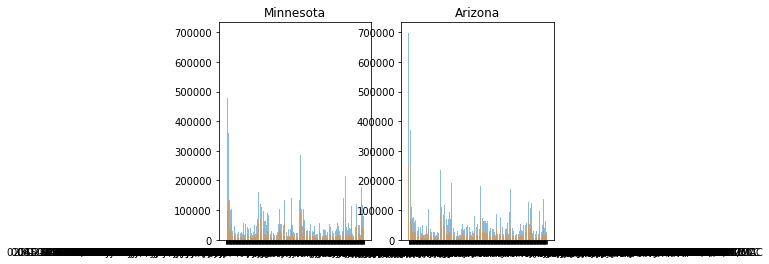

In [30]:
## lets look at Costs V Payments between two states - Minnesota and Arizona
mn_charges = inpatient_charges[inpatient_charges['Provider State'] == 'MN'].sort_values(by='Average Covered Charges', ascending=False)
mn_charges_grpd = mn_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })

plt.subplot(1, 2, 1)

plt.bar(mn_charges_grpd.index, mn_charges_grpd['Average Covered Charges'], align='center', alpha=0.5)
plt.bar(mn_charges_grpd.index, mn_charges_grpd['Average Total Payments'], align='center', alpha=0.5)
plt.title('Minnesota')


plt.subplot(1, 2, 2)
az_charges = inpatient_charges[inpatient_charges['Provider State'] == 'AZ'].sort_values(by='Average Covered Charges', ascending=False)
az_charges_grpd = mn_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })

plt.bar(az_charges_grpd.index, az_charges_grpd['Average Covered Charges'], align='center', alpha=0.5)
plt.bar(az_charges_grpd.index, az_charges_grpd['Average Total Payments'], align='center', alpha=0.5)
plt.title('Arizona')


plt.show()


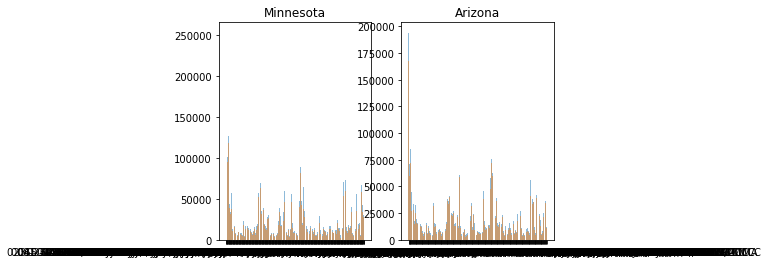

In [20]:
## lets look at Medicare versus Total Payments, generally Medicare is less the total payment
mn_charges = inpatient_charges[inpatient_charges['Provider State'] == 'MN'].sort
mn_charges_grpd = mn_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })

plt.subplot(1, 2, 1)
plt.bar(mn_charges_grpd.index, mn_charges_grpd['Average Total Payments'], align='center', alpha=0.5)
plt.bar(mn_charges_grpd.index, mn_charges_grpd['Average Medicare Payments'], align='center', alpha=0.5)
plt.title('Minnesota')


az_charges = inpatient_charges[inpatient_charges['Provider State'] == 'AZ']
az_charges_grpd = az_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })


plt.subplot(1, 2, 2)
plt.bar(az_charges_grpd.index, az_charges_grpd['Average Total Payments'], align='center', alpha=0.5)
plt.bar(az_charges_grpd.index, az_charges_grpd['Average Medicare Payments'], align='center', alpha=0.5)
plt.title('Arizona')

plt.show()

In [4]:
# make new column of how much left after medicare costs, percent  unpaid, paid by medicare, paid by other
inpatient_charges['Paid After Medicare'] = inpatient_charges['Average Total Payments'] - inpatient_charges['Average Medicare Payments']
inpatient_charges['Charges Unpaid'] = inpatient_charges['Average Covered Charges'] - inpatient_charges['Average Total Payments']
inpatient_charges['Unpaid Percent'] = ( inpatient_charges['Charges Unpaid'] / inpatient_charges['Average Covered Charges'])
inpatient_charges['Percent Non-Medicare Paid'] = inpatient_charges['Paid After Medicare'] / inpatient_charges['Average Covered Charges']
inpatient_charges['Percent Medicare Paid'] = inpatient_charges['Average Medicare Payments'] / inpatient_charges['Average Covered Charges']
inpatient_charges[['Paid After Medicare','Charges Unpaid', 'Unpaid Percent', 'Percent Non-Medicare Paid','Percent Medicare Paid' ]].head()

,Paid After Medicare,Charges Unpaid,Unpaid Percent,Percent Non-Medicare Paid,Percent Medicare Paid
0,29887.27,843702.27,0.831411,0.029452,0.139137
1,26569.43,187969.61,0.492001,0.069544,0.438454
2,29631.09,647830.77,0.666574,0.030488,0.302938
3,23644.50,1260680.28,0.830566,0.015578,0.153857
4,7678.12,1124190.94,0.764578,0.005222,0.230200


In [7]:
inpatient_charges[['Paid After Medicare','Charges Unpaid', 'Unpaid Percent', 'Percent Non-Medicare Paid','Percent Medicare Paid' ]].describe()

,Paid After Medicare,Charges Unpaid,Unpaid Percent,Percent Non-Medicare Paid,Percent Medicare Paid
count,201876.000000,2.018760e+05,201876.000000,201876.000000,201876.000000
mean,2005.655215,4.178909e+04,0.697589,0.052131,0.250280
std,2878.067346,5.494560e+04,0.176315,0.048316,0.154311
min,0.000000,-2.302254e+05,-10.984717,0.000000,0.023836
25%,981.245000,1.428144e+04,0.640958,0.023850,0.155542
50%,1261.915000,2.629683e+04,0.735408,0.042036,0.215535
75%,2064.632500,4.923825e+04,0.808813,0.068453,0.295006
max,267019.690000,2.513741e+06,0.967755,7.471466,11.504006


In [8]:
## divide data by states

# get list of states
states_list = inpatient_charges['Provider State'].unique()
np.sort(states_list)

states = {}

for state in states_list:
    states[state] = inpatient_charges[inpatient_charges['Provider State'] == state]

    
states



{'AL':                                            DRG Definition  Provider Id  \
 0       001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...        10033   
 74      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10023   
 75      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10029   
 76      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10033   
 77      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10039   
 78      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10087   
 79      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10092   
 80      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10103   
 81      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...        10113   
 481     004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...        10006   
 482     004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...        10023   
 483     004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...        10024   
 484     004 - TRAC

In [5]:
## group charges scatter plot
by_drg = inpatient_charges.groupby(['DRG Definition']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})
by_drg

by_state = inpatient_charges.groupby(['Provider State']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})

by_state

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Paid After Medicare,Charges Unpaid,Unpaid Percent,Percent Non-Medicare Paid,Percent Medicare Paid
Provider State,,,,,,,,,
AK,7014,74818.331217,19125.670494,17024.282395,2101.388099,55692.660722,0.705475,0.035892,0.258632
AL,157744,49662.852761,10001.460450,8519.758364,1481.702086,39661.392311,0.734938,0.048921,0.216141
AR,91376,38757.577923,10407.159338,8923.892477,1483.266861,28350.418585,0.669830,0.056819,0.273351
AZ,111890,62035.791685,13674.206843,11731.825529,1942.381315,48361.584842,0.758003,0.039725,0.202272
CA,503269,97691.860654,17170.263905,15185.624995,1984.638910,80521.596749,0.799068,0.027040,0.173892
CO,70133,67298.659740,13313.860779,11222.372887,2091.487892,53984.798961,0.780500,0.038976,0.180524
CT,101868,46287.800298,14934.697259,12538.688764,2396.008494,31353.103039,0.652799,0.059811,0.287390
DC,26936,69065.670797,19137.899176,14791.468892,4346.430284,49927.771622,0.687613,0.073319,0.239069
DE,36396,38310.267694,13869.744724,11438.489830,2431.254894,24440.522970,0.624604,0.078388,0.297008


In [31]:
## GROUP BY DRG DEFINITION - HEART TRANSPLANT HIGHEST COST
drg_data = ColumnDataSource(by_drg)
TOOLTIPS = [("DRG", "@{DRG Definition}")]

p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='Average Covered Charges', y = 'Average Total Payments', source=drg_data, size=7)
show(p)

In [32]:
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='Average Covered Charges', y = 'Paid After Medicare', source=drg_data, size=7)
p.xaxis.axis_label = 'Average Covered Charges'
p.yaxis.axis_label = 'Paid After Medicare'
show(p)

In [33]:
## GROUP BY STATE - 
state_data = ColumnDataSource(by_state)
TOOLTIPS = [("State", "@{Provider State}")]

p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='Average Covered Charges', y = 'Average Total Payments', source=state_data, size=7)
p.xaxis.axis_label = 'Average Covered Charges'
p.yaxis.axis_label = 'Average Total Paymets'
show(p)

In [34]:
TOOLTIPS = [("State", "@{Provider State}")]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='Average Covered Charges', y = 'Paid After Medicare', source=state_data, size=7)
p.xaxis.axis_label = 'Average Covered Charges'
p.yaxis.axis_label = 'Paid After Medicare'
show(p)

In [109]:
#Run K Means on DRG Data

from scipy.cluster.vq import kmeans,vq
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(by_drg)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(by_drg)
pca_pairs = pca.transform(by_drg)

[xpos,ypos] = [0,1]

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     drg=np.array(by_drg[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     drg=np.array(by_drg[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     drg=np.array(by_drg[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     drg=np.array(by_drg[clusterIDs==3].index)))
                                                              

TOOLTIPS = [("DRG", "@drg") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)



In [111]:
# KMeans on State Data
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(by_state)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(by_state)
pca_pairs = pca.transform(by_state)

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     state=np.array(by_state[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     state=np.array(by_state[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     state=np.array(by_state[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     state=np.array(by_state[clusterIDs==3].index)))
                                                       
                                                    
                         
                         

TOOLTIPS = [("State", "@state") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)


In [112]:
from sklearn import metrics
metrics.silhouette_score(by_state, clusterIDs, metric='euclidean')


0.542775649559001

In [121]:
## Grid Search

sil_scores = {}

for n in range(2,10):
    kmeansModel = KMeans(init='random', n_clusters=n, n_init=10)
    kmeansModel.fit_predict(by_state)
    clusterIDs = kmeansModel.labels_
    score = metrics.silhouette_score(by_state, clusterIDs, metric='euclidean')
    sil_scores[n]=(score)

sil_scores    


{2: 0.6493822318156284,
 3: 0.6147084064416667,
 4: 0.542775649559001,
 5: 0.5105580296188513,
 6: 0.46587042128412093,
 7: 0.4932723849555076,
 8: 0.47047139093458246,
 9: 0.46813100659527923}

In [122]:
## Grid Search - Sil Score

sil_scores = {}

for n in range(2,10):
    kmeansModel = KMeans(init='random', n_clusters=n, n_init=10)
    kmeansModel.fit_predict(by_drg)
    clusterIDs = kmeansModel.labels_
    score = metrics.silhouette_score(by_drg, clusterIDs, metric='euclidean')
    sil_scores[n]=(score)

sil_scores   

{2: 0.7269103154368679,
 3: 0.6180512949452183,
 4: 0.640486121487828,
 5: 0.5226274961826931,
 6: 0.5369002089615927,
 7: 0.417535169574204,
 8: 0.45034353724373616,
 9: 0.43646779407807557}

In [124]:
## Grid Search

ch_scores = {}

for n in range(2,10):
    kmeansModel = KMeans(init='random', n_clusters=n, n_init=10)
    kmeansModel.fit_predict(by_drg)
    clusterIDs = kmeansModel.labels_
    score =metrics.calinski_harabaz_score(by_drg, clusterIDs)
    ch_scores[n]=(score)

ch_scores 
 

{2: 570.0450404263763,
 3: 673.4290220501709,
 4: 649.6807385682172,
 5: 665.6422583040603,
 6: 760.4976124926317,
 7: 720.0012132661091,
 8: 882.6251891963612,
 9: 897.9608947495524}

In [130]:
## CA Only

ca_charges = inpatient_charges[inpatient_charges['Provider State'] == 'CA']
ca_by_drg = ca_charges.groupby(['DRG Definition']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})


# KMeans on State Data
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(ca_by_drg)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(ca_by_drg)
pca_pairs = pca.transform(ca_by_drg)

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     drg=np.array(ca_by_drg[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     drg=np.array(ca_by_drg[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     drg=np.array(ca_by_drg[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     drg=np.array(ca_by_drg[clusterIDs==3].index)))
                                                       
                                                    
                         
                         

TOOLTIPS = [("DRG", "@drg") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)


In [131]:
## TX Only

tx_charges = inpatient_charges[inpatient_charges['Provider State'] == 'TX']
tx_by_drg = tx_charges.groupby(['DRG Definition']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})


# KMeans on State Data
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(tx_by_drg)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(tx_by_drg)
pca_pairs = pca.transform(tx_by_drg)

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     drg=np.array(tx_by_drg[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     drg=np.array(tx_by_drg[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     drg=np.array(tx_by_drg[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     drg=np.array(tx_by_drg[clusterIDs==3].index)))
                                                       
                                                    
                         
                         

TOOLTIPS = [("DRG", "@drg") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)


In [132]:
## NY Only

ny_charges = inpatient_charges[inpatient_charges['Provider State'] == 'NY']
ny_by_drg = ny_charges.groupby(['DRG Definition']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})


# KMeans on State Data
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(ny_by_drg)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(ny_by_drg)
pca_pairs = pca.transform(ny_by_drg)

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     drg=np.array(ny_by_drg[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     drg=np.array(ny_by_drg[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     drg=np.array(ny_by_drg[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     drg=np.array(ny_by_drg[clusterIDs==3].index)))
                                                       
                                                    
                         
                         

TOOLTIPS = [("DRG", "@drg") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)


In [133]:
## FL Only

fl_charges = inpatient_charges[inpatient_charges['Provider State'] == 'FL']
fl_by_drg = fl_charges.groupby(['DRG Definition']).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})


# KMeans on State Data
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(fl_by_drg)
clusterIDs = kmeansModel.labels_

#for i, clustLabel in enumerate(clusterResults):
#    print("Cluster result: ", clustLabel, " DRG: ", inpatient_charges.loc[i]["DRG Definition"])

pca = PCA(n_components=2)
pca.fit(fl_by_drg)
pca_pairs = pca.transform(fl_by_drg)

clus1 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==0,xpos], 
     y=pca_pairs[clusterIDs==0,ypos],
     drg=np.array(fl_by_drg[clusterIDs==0].index)))
clus2 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==1,xpos], 
     y=pca_pairs[clusterIDs==1,ypos],
     drg=np.array(fl_by_drg[clusterIDs==1].index)))
clus3 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==2,xpos], 
     y=pca_pairs[clusterIDs==2,ypos],
     drg=np.array(fl_by_drg[clusterIDs==2].index)))
clus4 = ColumnDataSource(dict(x=pca_pairs[clusterIDs==3,xpos], 
     y=pca_pairs[clusterIDs==3,ypos],
     drg=np.array(fl_by_drg[clusterIDs==3].index)))
                                                       
                                                    
                         
                         

TOOLTIPS = [("DRG", "@drg") ]
p = figure(plot_width=900, plot_height=600, title=None, toolbar_location="below", tooltips=TOOLTIPS)
p.circle( x='x', y = 'y', source=clus1, size=7, color="gold")
p.circle( x='x', y = 'y', source=clus2, size=7, color="crimson")
p.circle( x='x', y = 'y', source=clus3, size=7, color="navy")
p.circle( x='x', y = 'y', source=clus4, size=7, color="aqua")
p.xaxis.axis_label = 'PCA 1'
p.yaxis.axis_label = 'PCA 2'

show(p)


In [ ]:
## plot clusters in terms of price

c1 = fl_by_drg[clusterIDs==0]
s1 = figure(x_range=cl.index, width=250, plot_height=250, title=None)
s1.vbar(x=cl.index, y=cl[])
fl_by_drg[clusterIDs==0].index


p = figure(x_range=fruits, plot_height=250, title="Fruit Counts",
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=counts, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in an HBox
p = hplot(s1, s2, s3)

# show the results
show(p)

In [142]:
fl_by_drg[clusterIDs==3].describe()


,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Paid After Medicare,Charges Unpaid,Unpaid Percent,Percent Non-Medicare Paid,Percent Medicare Paid
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,569.951220,234887.572830,43603.648441,37852.011711,5751.636730,191283.924389,0.795687,0.027652,0.176661
std,822.411514,56554.004390,12775.826406,11106.756844,5602.012388,49387.140279,0.049270,0.028822,0.032813
min,12.000000,176471.415333,28617.800000,22966.235714,1004.956667,122067.945000,0.622245,0.002857,0.107386
25%,57.000000,189177.860877,33440.127500,30300.678333,2859.626667,151278.246667,0.788618,0.014776,0.156761
50%,168.000000,216204.348571,40567.717895,34162.504286,4245.593333,172871.286867,0.803990,0.019780,0.176179
75%,719.000000,267573.835000,50367.726667,41250.072000,6207.918571,222822.630000,0.820735,0.029209,0.188071
max,4149.000000,384601.256667,76024.803333,75019.846667,28469.115000,308576.453333,0.855845,0.161441,0.265072


In [18]:
states_json = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}
state_data = inpatient_charges.groupby(['Provider State'], as_index=False).agg({'Total Discharges':'sum',
                              'Average Covered Charges': 'mean',
                              'Average Total Payments':'mean',
                              'Average Medicare Payments': 'mean',
                              'Paid After Medicare':'mean',
                              'Charges Unpaid':'mean',
                              'Unpaid Percent': 'mean', 
                              'Percent Non-Medicare Paid':'mean',
                              'Percent Medicare Paid':'mean'})
state_data = state_data.replace(states_json)

,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Paid After Medicare,Charges Unpaid,Unpaid Percent,Percent Non-Medicare Paid,Percent Medicare Paid
0,Alaska,7014,74818.331217,19125.670494,17024.282395,2101.388099,55692.660722,0.705475,0.035892,0.258632
1,Alabama,157744,49662.852761,10001.460450,8519.758364,1481.702086,39661.392311,0.734938,0.048921,0.216141
2,Arkansas,91376,38757.577923,10407.159338,8923.892477,1483.266861,28350.418585,0.669830,0.056819,0.273351
3,Arizona,111890,62035.791685,13674.206843,11731.825529,1942.381315,48361.584842,0.758003,0.039725,0.202272
4,California,503269,97691.860654,17170.263905,15185.624995,1984.638910,80521.596749,0.799068,0.027040,0.173892
5,Colorado,70133,67298.659740,13313.860779,11222.372887,2091.487892,53984.798961,0.780500,0.038976,0.180524
6,Connecticut,101868,46287.800298,14934.697259,12538.688764,2396.008494,31353.103039,0.652799,0.059811,0.287390
7,District Of Columbia,26936,69065.670797,19137.899176,14791.468892,4346.430284,49927.771622,0.687613,0.073319,0.239069
8,Delaware,36396,38310.267694,13869.744724,11438.489830,2431.254894,24440.522970,0.624604,0.078388,0.297008
9,Florida,607658,67915.212688,11426.114555,9757.247957,1668.866598,56489.098132,0.809960,0.033119,0.156921


In [21]:
state_geo = os.path.join('us-states.json')



m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(geo_data = state_geo, 
              data = state_data,
              columns = ['Provider State', 'Average Covered Charges'],
              key_on = 'feature.properties.name',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Average Covered Charges').add_to(m)

folium.LayerControl().add_to(m)

m

In [28]:
from math import pi

state_data = state_data.sort_values(by='Average Covered Charges', ascending=False)
costs = state_data['Average Covered Charges']
states = state_data['Provider State']

source = ColumnDataSource(data=dict(states=states, costs=costs))
                          
tooltips= [("State", "@states")]
p = figure(x_range=states, plot_height=600, plot_width=800, title="Charges by State",
           toolbar_location=None, tools="hover", tooltips=tooltips)
p.vbar(x='states', top='costs',width=0.7, color="#e84d60", source=source)

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
#p.xaxis.major_label_text_font_size = '0pt'
p.yaxis[0].formatter = NumeralTickFormatter(format="$0")
p.xaxis.major_label_orientation = pi/4


show(p)

In [ ]:
##next steps
# examine smaller- one DRG across the states, vis with choropleths to see variation. Do they align with average? 
# Are there discrepancies? 
# Do sums need to be adjusted by population size? 
# What does clustering tell me? 
# Or do yearly data 2011 - 2016 to see changes over time?
# outpatient? 

## Emphasis on medical charges - out of control 